In [1]:
import numpy as np 
from sklearn.preprocessing import LabelBinarizer
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.utils import shuffle


In [2]:
df = pd.read_csv("dataset/dataset_completo.csv")

/home/vinny/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (84) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.describe

<bound method NDFrame.describe of                                        Flow ID     Source IP  Source Port  \
0          192.168.50.7-72.21.91.29-51679-80-6  192.168.50.7        51679   
1        172.217.3.98-192.168.50.8-443-59431-6  192.168.50.8        59431   
2        192.168.10.50-192.168.50.8-22-59435-6  192.168.50.8        59435   
3             192.168.50.6-8.8.8.8-52025-53-17  192.168.50.6        52025   
4         172.217.7.3-192.168.50.8-443-59408-6   172.217.7.3          443   
...                                        ...           ...          ...   
153626  172.16.0.5-192.168.50.1-47613-56139-17    172.16.0.5        47613   
153627  172.16.0.5-192.168.50.1-43815-54076-17    172.16.0.5        43815   
153628  172.16.0.5-192.168.50.1-36421-59285-17    172.16.0.5        36421   
153629  172.16.0.5-192.168.50.1-49369-48106-17    172.16.0.5        49369   
153630  172.16.0.5-192.168.50.1-40741-30249-17    172.16.0.5        40741   

       Destination IP  Destination Port  

In [4]:
#printando as colunas
for col in df.columns:
    print(col)

Flow ID
Source IP
Source Port
Destination IP
Destination Port
Protocol
Timestamp
Flow Duration
Total Fwd Packets
Total Backward Packets
Total Length of Fwd Packets
Total Length of Bwd Packets
Fwd Packet Length Max
Fwd Packet Length Min
Fwd Packet Length Mean
Fwd Packet Length Std
Bwd Packet Length Max
Bwd Packet Length Min
Bwd Packet Length Mean
Bwd Packet Length Std
Flow Bytes/s
Flow Packets/s
Flow IAT Mean
Flow IAT Std
Flow IAT Max
Flow IAT Min
Fwd IAT Total
Fwd IAT Mean
Fwd IAT Std
Fwd IAT Max
Fwd IAT Min
Bwd IAT Total
Bwd IAT Mean
Bwd IAT Std
Bwd IAT Max
Bwd IAT Min
Fwd PSH Flags
Bwd PSH Flags
Fwd URG Flags
Bwd URG Flags
Fwd Header Length
Bwd Header Length
Fwd Packets/s
Bwd Packets/s
Min Packet Length
Max Packet Length
Packet Length Mean
Packet Length Std
Packet Length Variance
FIN Flag Count
SYN Flag Count
RST Flag Count
PSH Flag Count
ACK Flag Count
URG Flag Count
CWE Flag Count
ECE Flag Count
Down/Up Ratio
Average Packet Size
Avg Fwd Segment Size
Avg Bwd Segment Size
Fwd Header 

In [5]:
df.isnull().sum().sum()

57

In [6]:
df.shape

(153631, 87)

In [7]:
df = df[df.notna().all(1)]

In [8]:
df.shape

(153574, 87)

In [9]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.isnull().sum().sum()

/home/vinny/.local/lib/python3.8/site-packages/pandas/core/frame.py:4521: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


5890

In [10]:
df = df[df.notna().all(1)]
df.shape

(150629, 87)

In [11]:
df.groupby(['Label']).size()

Label
BENIGN           13623
DrDoS_DNS        24523
DrDoS_LDAP       10702
DrDoS_MSSQL      21940
DrDoS_NTP         5985
DrDoS_NetBIOS    19783
DrDoS_SNMP       25745
DrDoS_SSDP       12867
DrDoS_UDP        15461
dtype: int64

In [12]:
df.loc[df['Label'] != "BENIGN", 'Label'] = 'DDOS'

In [13]:
df.groupby(['Label']).size()

Label
BENIGN     13623
DDOS      137006
dtype: int64

In [14]:
lb = LabelBinarizer()
df['Label'] = lb.fit_transform(df['Label'].values)


In [15]:
df.groupby(['Label']).size()

Label
0     13623
1    137006
dtype: int64

In [16]:
dttype = df.dtypes
print(dttype)

Flow ID              object
Source IP            object
Source Port           int64
Destination IP       object
Destination Port      int64
                     ...   
Idle Max            float64
Idle Min            float64
SimillarHTTP         object
Inbound               int64
Label                 int64
Length: 87, dtype: object


In [17]:
for col in df.columns:
    if df[col].dtypes == 'object' :
        print(col)

Flow ID
Source IP
Destination IP
Timestamp
SimillarHTTP


In [18]:
df.drop('Flow ID', axis=1, inplace=True)
df.drop('Source IP', axis=1, inplace=True)
df.drop('Destination IP', axis=1, inplace=True)
df.drop('Timestamp', axis=1, inplace=True)
df.drop('SimillarHTTP', axis=1, inplace=True)
df.drop('Source Port', axis=1, inplace=True)
df.drop('Protocol', axis=1, inplace=True)
df.drop('Flow Duration', axis=1, inplace=True)
df.drop('Destination Port', axis=1, inplace=True)

In [19]:
for col in df.columns:
    print(col)

Total Fwd Packets
Total Backward Packets
Total Length of Fwd Packets
Total Length of Bwd Packets
Fwd Packet Length Max
Fwd Packet Length Min
Fwd Packet Length Mean
Fwd Packet Length Std
Bwd Packet Length Max
Bwd Packet Length Min
Bwd Packet Length Mean
Bwd Packet Length Std
Flow Bytes/s
Flow Packets/s
Flow IAT Mean
Flow IAT Std
Flow IAT Max
Flow IAT Min
Fwd IAT Total
Fwd IAT Mean
Fwd IAT Std
Fwd IAT Max
Fwd IAT Min
Bwd IAT Total
Bwd IAT Mean
Bwd IAT Std
Bwd IAT Max
Bwd IAT Min
Fwd PSH Flags
Bwd PSH Flags
Fwd URG Flags
Bwd URG Flags
Fwd Header Length
Bwd Header Length
Fwd Packets/s
Bwd Packets/s
Min Packet Length
Max Packet Length
Packet Length Mean
Packet Length Std
Packet Length Variance
FIN Flag Count
SYN Flag Count
RST Flag Count
PSH Flag Count
ACK Flag Count
URG Flag Count
CWE Flag Count
ECE Flag Count
Down/Up Ratio
Average Packet Size
Avg Fwd Segment Size
Avg Bwd Segment Size
Fwd Header Length.1
Fwd Avg Bytes/Bulk
Fwd Avg Packets/Bulk
Fwd Avg Bulk Rate
Bwd Avg Bytes/Bulk
Bwd Avg P

In [20]:
df.describe

<bound method NDFrame.describe of         Total Fwd Packets  Total Backward Packets  \
0                       2                       2   
1                       2                       0   
2                       4                       0   
3                       2                       2   
4                       2                       0   
...                   ...                     ...   
153626                  4                       0   
153627                  2                       0   
153628                  4                       0   
153629                  2                       0   
153630                  2                       0   

        Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                               2.0                          0.0   
1                               0.0                          0.0   
2                               0.0                          0.0   
3                              70.0                      

In [21]:
df_shuffle = shuffle(df, random_state=None).reset_index(drop=True)

int_80 = int(df_shuffle.shape[0] * 0.8)

df_80 = df_shuffle.loc[:int_80, :]
df_20 = df_shuffle.loc[int_80:, :]

In [22]:
x_train = df_80.drop('Label',1)
y_train = df_80.Label
x_test = df_20.drop('Label',1)
y_test = df_20.Label

In [23]:
column_names = list(x_train)
column_names_test = list(x_test)

In [24]:
x_train.fillna(x_train.mean(), inplace=True)
x_test.fillna(x_test.mean(), inplace=True)
# Feature scaling to make sure our basic results for feature selection are correct
scaler_train = preprocessing.StandardScaler().fit(x_train)
x_train = scaler_train.transform(x_train)
scaler_test = preprocessing.StandardScaler().fit(x_test)
x_test = scaler_test.transform(x_test)

In [25]:
print(x_train.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


In [26]:
# No NaN value in train and test!
where_are_NaNs = np.isnan(x_train)
x_train[where_are_NaNs] = 0
where_are_NaNs = np.isnan(x_test)
x_test[where_are_NaNs] = 0

In [27]:
feature_selection_model=DecisionTreeClassifier(random_state=0)
feature_selection_model.fit(x_train, y_train.astype('int'))
feature_selector = RFECV(estimator=feature_selection_model, step=1, cv=10, scoring='accuracy')
feature_selector.fit(x_test, y_test)

RFECV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
      scoring='accuracy')

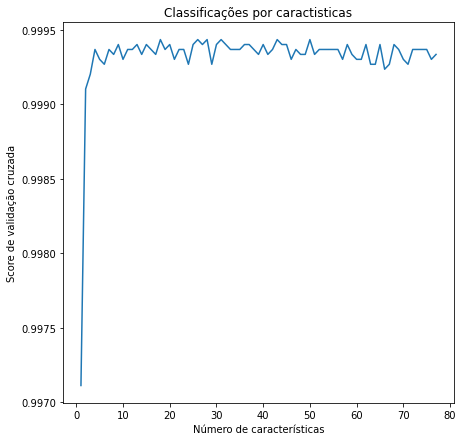

In [38]:
plt.figure(figsize=(7,7))
plt.xlabel("Número de características")
plt.ylabel("Score de validação cruzada")
plt.title('Classificações por caractisticas')
plt.plot(range(1, len(feature_selector.grid_scores_) + 1), feature_selector.grid_scores_)
plt.savefig('graf_carac.png')

In [39]:
decision_tree = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=decision_tree, n_features_to_select=20, step=1)
rfe.fit(x_train, y_train.astype('int'))
true=rfe.support_
rfe_feature_index = [i for i, x in enumerate(true) if x]
rfe_feature_names = list(column_names[i] for i in rfe_feature_index)
print('Selected features: ', rfe_feature_names)

Selected features:  ['Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Min', 'Bwd IAT Mean', 'Bwd Packets/s', 'Min Packet Length', 'URG Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Subflow Fwd Packets', 'Subflow Bwd Packets', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'Idle Min', 'Inbound']
